In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
avocado = pd.read_csv("avocado.csv")
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

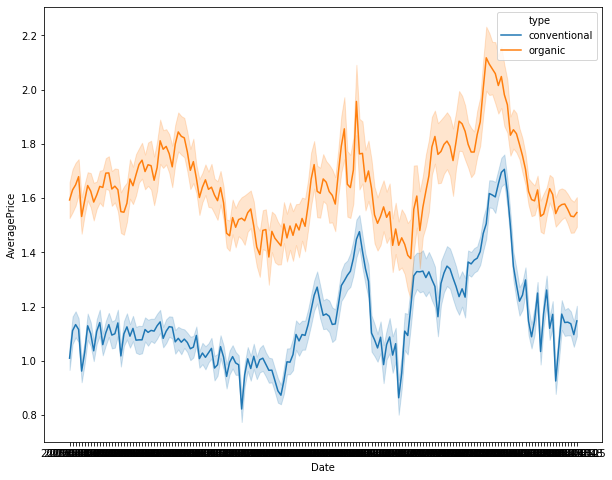

In [7]:
plt.figure(figsize=(10,8))
sns.lineplot(data=avocado,x="Date",y="AveragePrice",hue="type")

In [8]:
avocado.sample(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
6501,37,2017-04-16,1.56,261861.07,50600.52,123726.97,83.48,87450.10,74662.80,12787.30,0.00,conventional,2017,HarrisburgScranton
11747,21,2015-08-02,1.50,1200.48,7.15,0.00,0.00,1193.33,1193.33,0.00,0.00,organic,2015,Tampa
12634,25,2016-07-03,1.05,21345.19,778.40,9330.90,0.00,11235.89,857.26,10378.63,0.00,organic,2016,Detroit
9264,34,2015-05-03,1.66,16396.29,6666.67,3755.62,1163.90,4810.10,4806.79,3.31,0.00,organic,2015,BaltimoreWashington
13995,34,2016-05-01,1.35,6667.12,159.26,3652.08,0.00,2855.78,2042.63,813.15,0.00,organic,2016,Roanoke
5133,37,2016-04-10,0.96,397990.96,158605.28,126384.55,6056.81,106944.32,57960.91,48983.41,0.00,conventional,2016,SouthCarolina
5868,40,2017-03-26,1.51,550948.58,6860.31,412840.77,3403.92,127843.58,115695.54,11461.93,686.11,conventional,2017,Boston
9373,39,2015-03-29,1.98,2121.96,22.27,745.34,0.00,1354.35,1314.35,40.00,0.00,organic,2015,Boston
8874,0,2018-03-25,0.59,1684537.69,932956.86,296968.67,14886.96,439725.20,216076.58,218329.73,5318.89,conventional,2018,PhoenixTucson
684,8,2015-11-01,1.04,340746.59,112432.15,67252.29,104529.50,56532.65,35176.99,1106.60,20249.06,conventional,2015,Detroit


In [9]:
df = avocado.dropna()

In [10]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [11]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

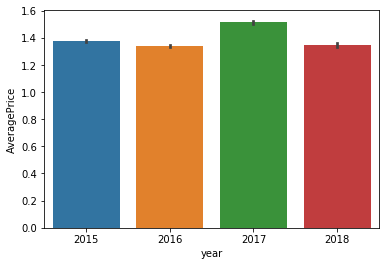

In [12]:
sns.barplot(x="year",y="AveragePrice",data=df)

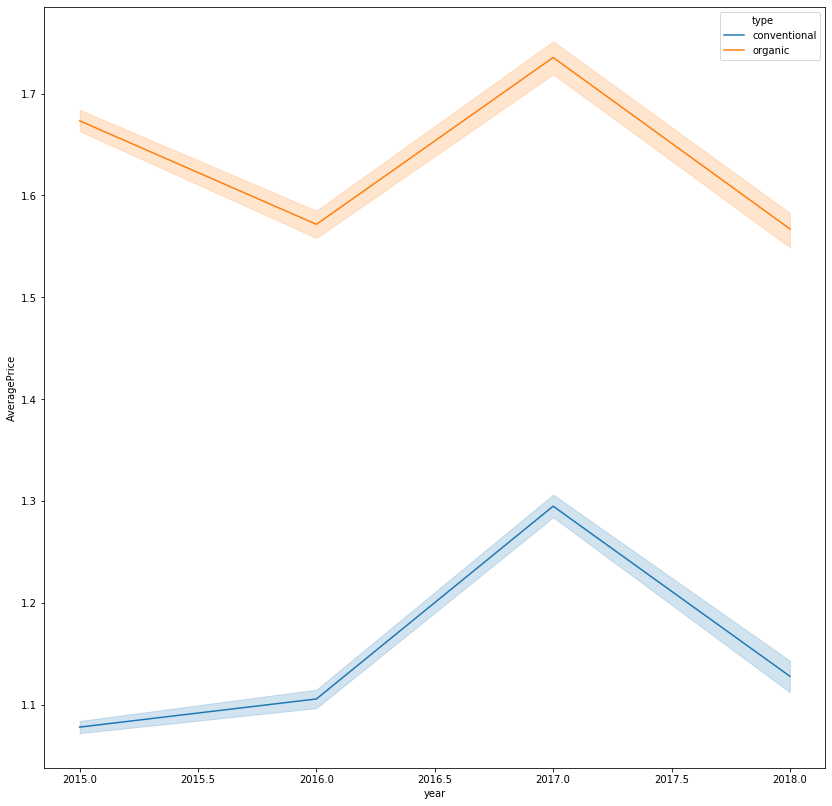

In [13]:
plt.figure(figsize=(14,14))
sns.lineplot(data=df,x="year",y="AveragePrice",hue="type")

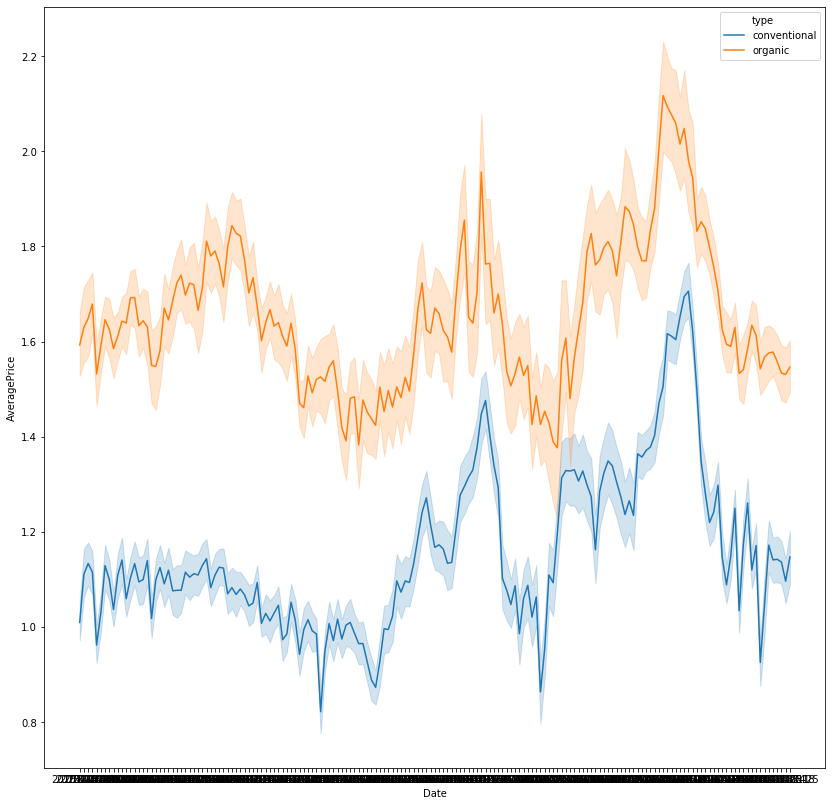

In [14]:
plt.figure(figsize=(14,14))
sns.lineplot(data=df,x="Date",y="AveragePrice",hue="type")

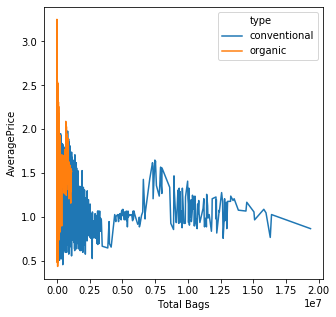

In [15]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="Total Bags",y="AveragePrice",hue="type")

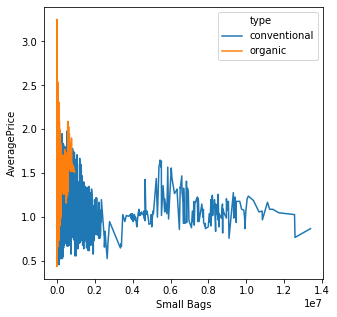

In [16]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="Small Bags",y="AveragePrice",hue="type")

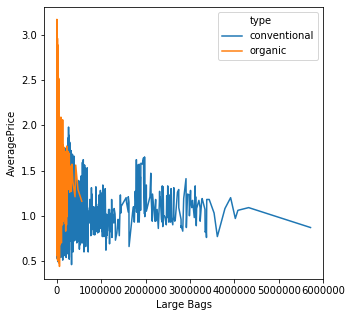

In [17]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="Large Bags",y="AveragePrice",hue="type")

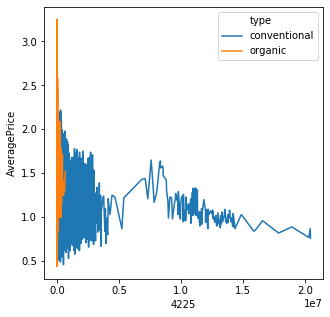

In [18]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="4225",y="AveragePrice",hue="type")

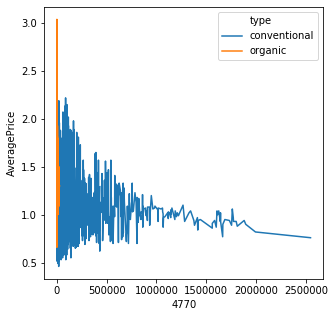

In [19]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="4770",y="AveragePrice",hue="type")

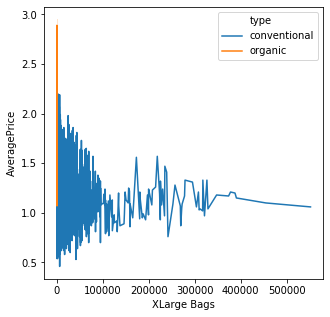

In [20]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="XLarge Bags",y="AveragePrice",hue="type")

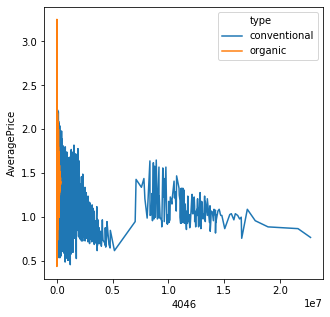

In [21]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="4046",y="AveragePrice",hue="type")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF8DE495C8>,
      dtype=object)

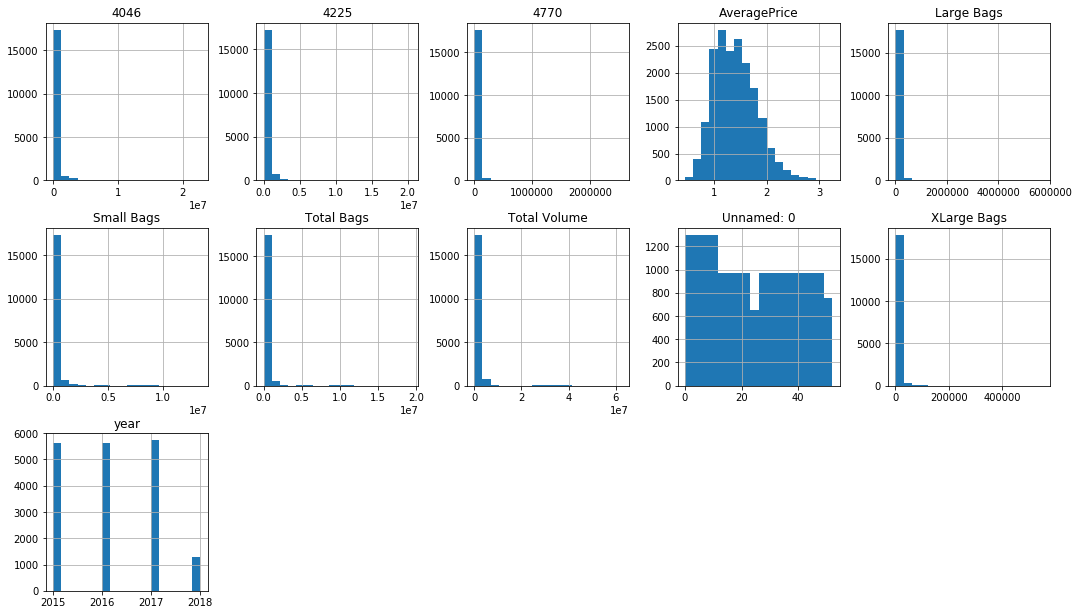

In [22]:
df.hist(figsize=(18,18),layout=(5,5),bins=18)

In [23]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [24]:
df["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [25]:
df["year"].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [26]:
df["XLarge Bags"].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [27]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [28]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

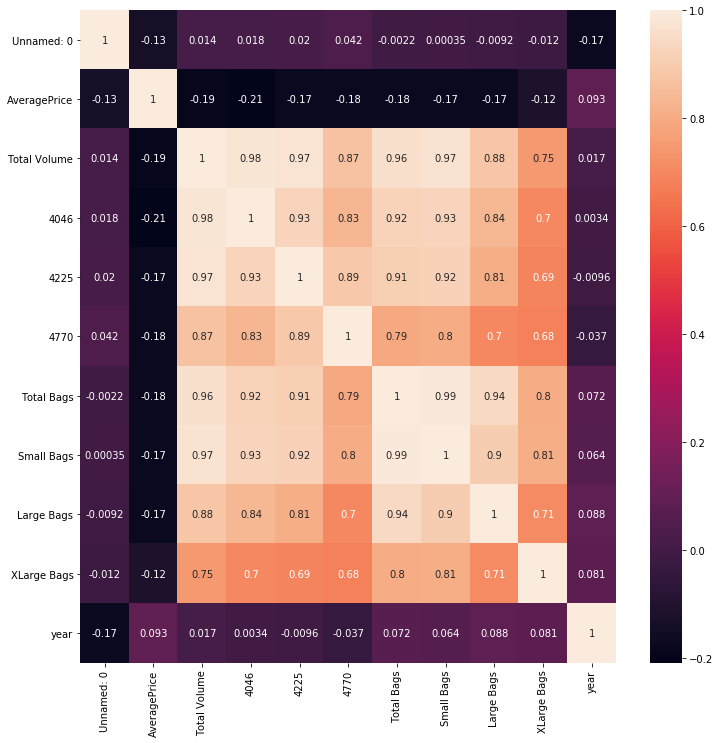

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [30]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
        return col_corr

In [31]:
corr_features = correlation(df,0.85)
len(set(corr_features))

0

no correlation between independent variables observed

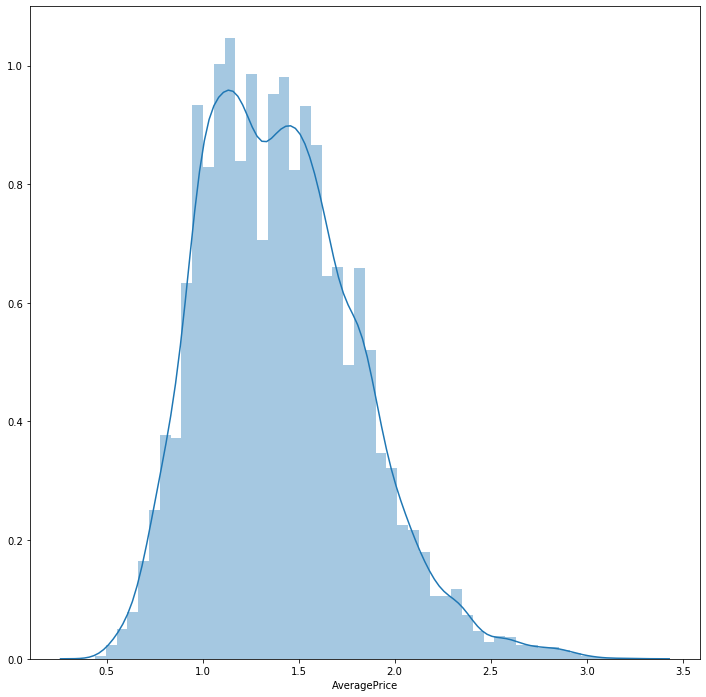

In [32]:
plt.figure(figsize=(12,12))
x = df["AveragePrice"]
sns.distplot(x)

<Figure size 864x864 with 0 Axes>

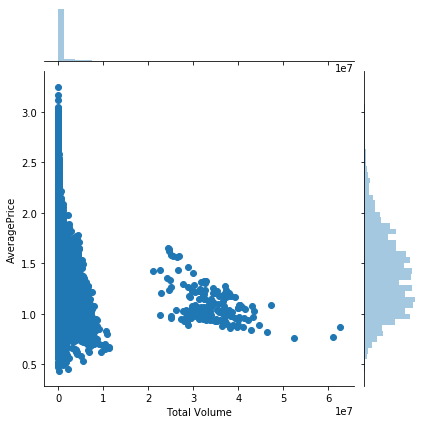

In [33]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,x="Total Volume",y ="AveragePrice")


<Figure size 864x864 with 0 Axes>

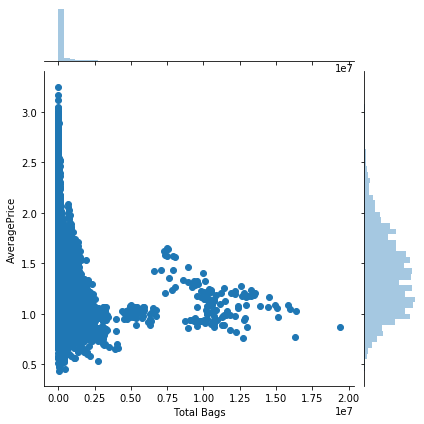

In [34]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,x="Total Bags",y ="AveragePrice")

<Figure size 864x864 with 0 Axes>

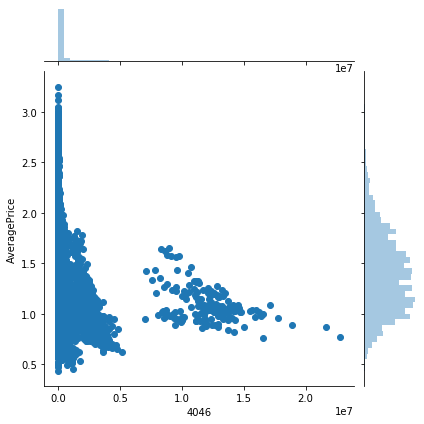

In [35]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,x="4046",y ="AveragePrice")

<Figure size 864x864 with 0 Axes>

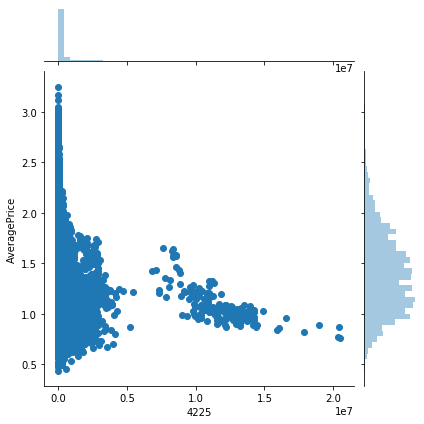

In [36]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,x="4225",y ="AveragePrice")

<Figure size 864x864 with 0 Axes>

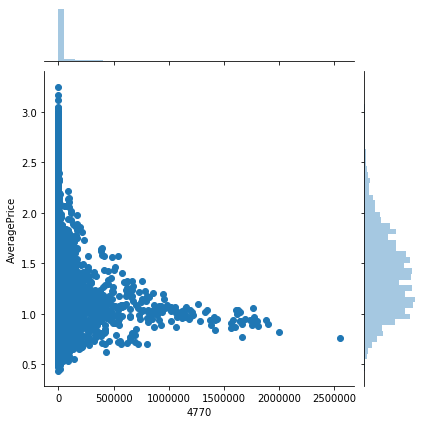

In [37]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,x="4770",y ="AveragePrice")

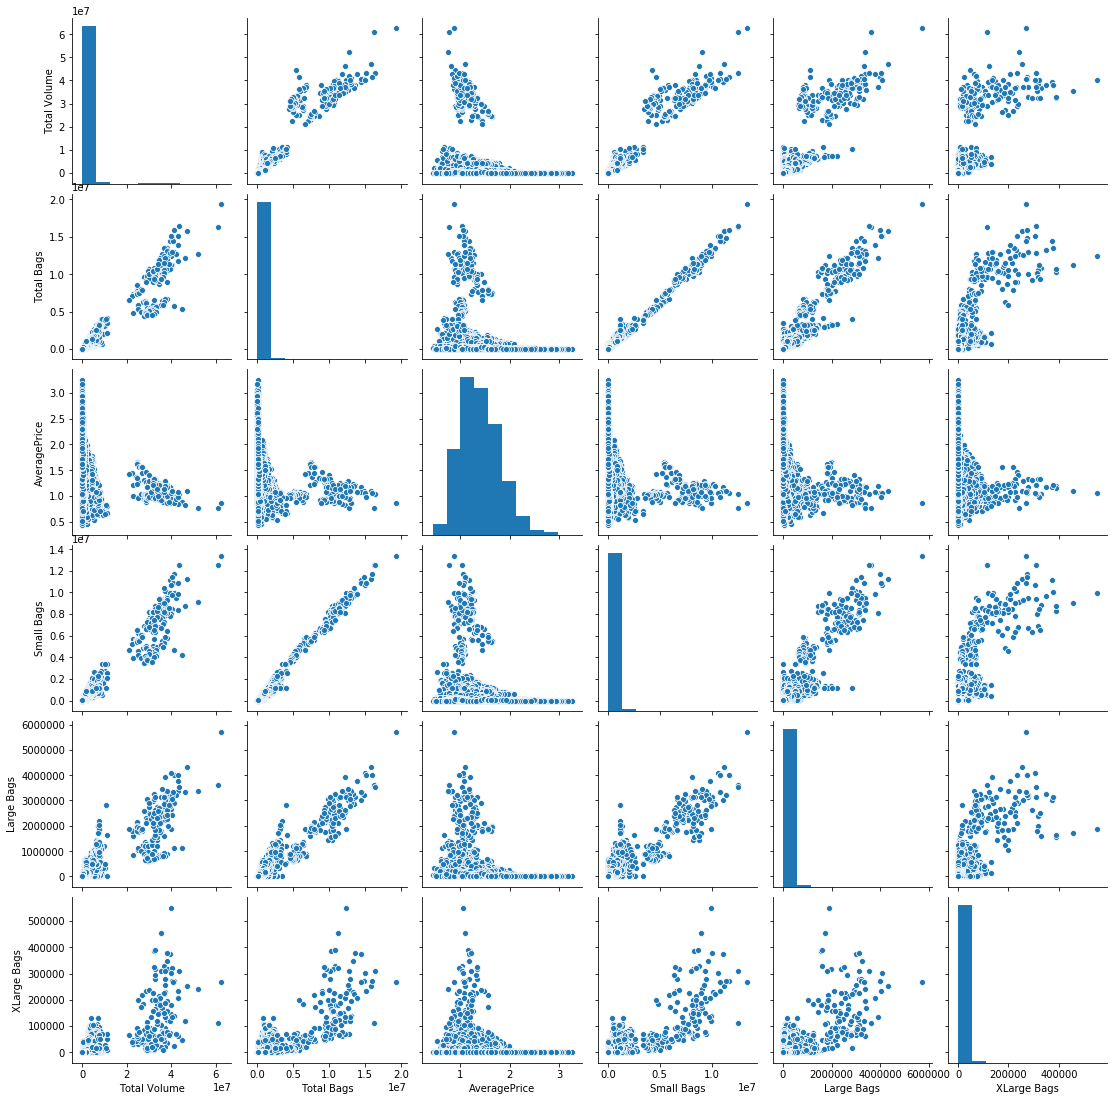

In [38]:
df_new = df[["Total Volume","Total Bags","AveragePrice","Small Bags","Large Bags",'XLarge Bags']]
sns.pairplot(df_new)

In [39]:
avo =df.drop(["year","Date","Unnamed: 0"],axis=1)
avo

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


In [40]:
avo.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [41]:
avo.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
4046             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
4225            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
4770            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

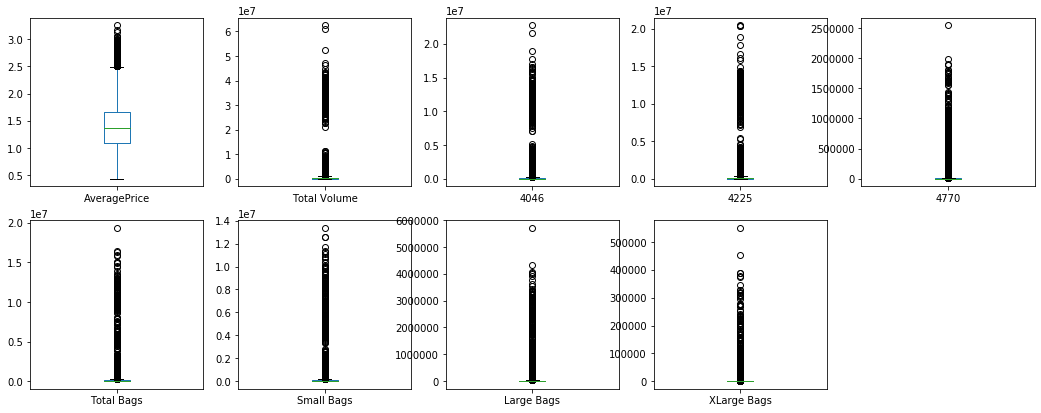

In [42]:
avo.plot(kind="box",subplots=True,layout=(5,5),figsize=(18,18))

In [43]:
avo.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
region           object
dtype: object

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
avo["region"]   = le.fit_transform(avo["region"].astype(str))
avo["type"]   = le.fit_transform(avo["region"].astype(str))

In [45]:
avo.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
region            int32
dtype: object

AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
4046             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
4225            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
4770            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
type            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
region             AxesSubplot(0.125,0.437414;0.133621x0.130172)
dtype: object

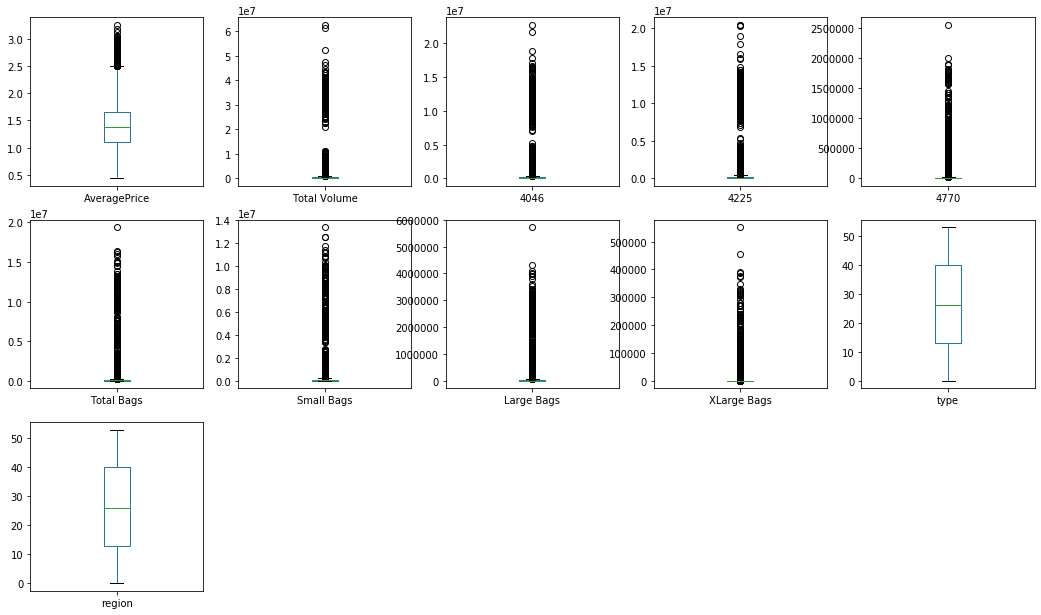

In [46]:
avo.plot(kind="box",subplots=True,layout=(5,5),figsize=(18,18))

In [47]:
from scipy.stats import zscore
z = np.abs(zscore(avo))
z
print(avo.shape)
avocado_final =avo.loc[(z<3).all(axis=1)]
print(avocado_final.shape)

(18249, 11)
(17651, 11)


In [48]:
avocado_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17651 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17651 non-null  float64
 1   Total Volume  17651 non-null  float64
 2   4046          17651 non-null  float64
 3   4225          17651 non-null  float64
 4   4770          17651 non-null  float64
 5   Total Bags    17651 non-null  float64
 6   Small Bags    17651 non-null  float64
 7   Large Bags    17651 non-null  float64
 8   XLarge Bags   17651 non-null  float64
 9   type          17651 non-null  int32  
 10  region        17651 non-null  int32  
dtypes: float64(9), int32(2)
memory usage: 1.5 MB


In [49]:
avocado_final.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
count,17651.000000,1.765100e+04,1.765100e+04,1.765100e+04,17651.000000,1.765100e+04,1.765100e+04,17651.000000,17651.000000,17651.000000,17651.000000
mean,1.405363,4.612232e+05,1.546436e+05,1.656009e+05,11160.558411,1.298160e+05,1.006283e+05,27830.325482,1357.351712,26.113761,26.103110
std,0.385793,1.012727e+06,4.395780e+05,3.991041e+05,34488.049314,2.821081e+05,2.295134e+05,73026.707330,5240.345626,15.483936,15.396005
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.110000,1.056651e+04,8.219250e+02,2.889740e+03,0.000000,4.959780e+03,2.746415e+03,112.660000,0.000000,13.000000,13.000000
50%,1.380000,1.002071e+05,7.785240e+03,2.670378e+04,163.960000,3.756260e+04,2.454157e+04,2448.660000,0.000000,26.000000,26.000000
75%,1.660000,3.911843e+05,9.840492e+04,1.288019e+05,5284.600000,1.020218e+05,7.838981e+04,19089.250000,73.670000,39.000000,39.000000
max,2.610000,8.362504e+06,4.085859e+06,3.894802e+06,344488.510000,2.782725e+06,2.348868e+06,781447.290000,55940.330000,53.000000,53.000000


In [50]:
x = avocado_final.drop(["AveragePrice"],axis=1)
y = avocado_final["AveragePrice"]
df_x = x = avocado_final.drop(["AveragePrice"],axis=1)

In [51]:
x.shape

(17651, 10)

In [52]:
y.shape

(17651,)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=df_x.columns)

In [54]:
x.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type            0.032013
region          0.012798
dtype: float64

In [55]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x
     

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,-0.571229,-0.764596,-0.029905,-0.664880,-0.840353,-0.750932,-0.807589,-0.513907,-1.704897,-1.702223
1,-0.626867,-0.772259,-0.167107,-0.661802,-0.821593,-0.727154,-0.807109,-0.513907,-1.704897,-1.702223
2,-0.271095,-0.769711,0.590605,-0.640050,-0.853212,-0.767637,-0.806468,-0.513907,-1.704897,-1.702223
3,-0.485717,-0.762586,0.194337,-0.657495,-0.908213,-0.839001,-0.803000,-0.513907,-1.704897,-1.702223
4,-0.649995,-0.766608,-0.178676,-0.656529,-0.899365,-0.829588,-0.795771,-0.513907,-1.704897,-1.702223
...,...,...,...,...,...,...,...,...,...,...
17646,-0.862926,-0.743338,-0.878849,-0.679495,-0.730588,-0.621325,-0.769435,-0.513907,1.466520,1.739911
17647,-0.883677,-0.761326,-0.843411,-0.679495,-0.827166,-0.740966,-0.781448,-0.513907,1.466520,1.739911
17648,-0.884469,-0.761322,-0.861594,-0.465744,-0.824172,-0.728811,-0.813370,-0.513907,1.466520,1.739911
17649,-0.868575,-0.754249,-0.851767,-0.466008,-0.787915,-0.682977,-0.812496,-0.513907,1.466520,1.739911


In [56]:
x.skew()

Total Volume    0.728259
4046            1.006111
4225            0.836245
4770            1.196401
Total Bags      0.677480
Small Bags      0.706580
Large Bags      0.956661
XLarge Bags     1.682479
type            0.006883
region          0.003622
dtype: float64

In [57]:
x.head() 

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,-0.571229,-0.764596,-0.029905,-0.664880,-0.840353,-0.750932,-0.807589,-0.513907,-1.704897,-1.702223
1,-0.626867,-0.772259,-0.167107,-0.661802,-0.821593,-0.727154,-0.807109,-0.513907,-1.704897,-1.702223
2,-0.271095,-0.769711,0.590605,-0.640050,-0.853212,-0.767637,-0.806468,-0.513907,-1.704897,-1.702223
3,-0.485717,-0.762586,0.194337,-0.657495,-0.908213,-0.839001,-0.803000,-0.513907,-1.704897,-1.702223
4,-0.649995,-0.766608,-0.178676,-0.656529,-0.899365,-0.829588,-0.795771,-0.513907,-1.704897,-1.702223


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state= r_state
print("max r2 score to ", final_r_state,"is", max_r_score)

max r2 score to  557 is 0.38653644563030787


In [59]:
from sklearn.model_selection import cross_val_score
a_score = cross_val_score(LinearRegression(),x,y,cv=5,scoring ="r2")
a_score

array([-1.72437764, -0.07018513,  0.38728259,  0.04131975, -0.13764945])

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.0001}

In [61]:
ls = Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.3570655430727959

In [62]:
rg = Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.35708810060893964

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [120]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators =1000)
print("Mean r2 score for gradient boosting regressor is" ,cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation for gradient boosting regressor is" ,cross_val_score(gbr,x,y,cv=5,scoring="r2").std())


Mean r2 score for gradient boosting regressor is 0.9997196179515802
Standard Deviation for gradient boosting regressor is 0.00020680861335593018


In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [122]:
knr = KNeighborsRegressor()
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knr,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 7}

In [154]:
knr = KNeighborsRegressor(n_neighbors=7)
knr.fit(x_train,y_train)
pred = knr.predict(x_test)
r2 = r2_score(y_test,pred)
print("r2 ;",r2*100)

r2 ; 94.9614409461635


In [155]:
def maxr2_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,1000):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_score)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [156]:
r_state = maxr2_score(lr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  43 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  44 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  45 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  46 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  47 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  48 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  49 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  50 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  51 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  52 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  53 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  54 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to

r2 score corresponding to  155 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  156 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  157 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  158 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  159 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  160 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  161 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  162 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  163 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  164 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  165 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  166 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  167 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  264 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  265 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  266 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  267 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  268 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  269 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  270 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  271 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  272 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  273 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  274 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  275 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  276 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  378 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  379 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  380 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  381 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  382 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  383 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  384 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  385 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  386 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  387 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  388 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  389 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  390 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  489 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  490 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  491 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  492 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  493 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  494 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  495 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  496 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  497 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  498 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  499 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  500 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  501 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  610 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  611 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  612 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  613 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  614 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  615 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  616 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  617 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  618 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  619 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  620 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  621 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  622 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  727 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  728 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  729 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  730 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  731 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  732 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  733 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  734 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  735 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  736 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  737 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  738 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  739 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  838 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  839 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  840 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  841 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  842 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  843 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  844 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  845 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  846 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  847 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  848 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  849 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  850 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  958 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  959 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  960 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  961 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  962 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  963 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  964 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  965 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  966 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  967 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  968 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  969 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  970 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

In [158]:
knr = KNeighborsRegressor(n_neighbors=7)
r_state = maxr2_score(knr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  43 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  44 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  45 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  46 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  47 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  48 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  49 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  50 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  51 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  52 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  53 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  54 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to

r2 score corresponding to  151 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  152 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  153 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  154 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  155 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  156 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  157 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  158 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  159 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  160 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  161 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  162 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  163 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  259 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  260 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  261 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  262 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  263 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  264 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  265 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  266 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  267 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  268 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  269 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  270 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  271 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  367 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  368 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  369 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  370 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  371 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  372 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  373 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  374 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  375 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  376 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  377 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  378 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  379 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  475 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  476 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  477 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  478 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  479 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  480 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  481 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  482 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  483 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  484 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  485 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  486 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  487 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  583 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  584 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  585 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  586 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  587 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  588 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  589 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  590 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  591 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  592 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  593 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  594 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  595 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  691 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  692 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  693 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  694 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  695 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  696 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  697 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  698 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  699 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  700 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  701 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  702 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  703 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  799 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  800 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  801 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  802 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  803 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  804 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  805 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  806 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  807 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  808 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  809 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  810 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  811 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

r2 score corresponding to  907 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  908 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  909 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  910 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  911 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  912 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  913 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  914 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  915 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  916 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  917 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  918 is <function r2_score at 0x000001EF8C50AA68>
r2 score corresponding to  919 is <function r2_score at 0x000001EF8C50AA68>
r2 score cor

here KneighborsRegressor gave me best score of approx 96%

In [159]:
from sklearn.externals import joblib
joblib.dump(knr,"Avocado Prices.csv")

['Avocado Prices.csv']

In [160]:
model1 = joblib.load("Avocado Prices.csv")

In [161]:
model1.predict(x_test)

array([15.        , 28.        , 34.        , ..., 33.        ,
       29.42857143, 42.        ])

In [162]:
from scipy.stats import zscore
z = np.abs(zscore(avo))
z
print(avo.shape)
av =avo.loc[(z<3).all(axis=1)]
print(av.shape)

(18249, 11)
(17651, 11)


In [163]:
x = av.drop(["region"],axis=1)
y = av["region"]
df_x = av.drop(["region"],axis=1)

In [164]:
x.shape

(17651, 10)

In [165]:
x.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type            0.032013
dtype: float64

In [166]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x
    

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-2.014989
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-2.014989
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-2.014989
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-2.014989
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-2.014989
...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.364017
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.364017
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.364017
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.364017


In [167]:
x.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.251710
dtype: float64

# Here we are predicting the region 

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [169]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=df_x.columns)

In [170]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-2.014989
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-2.014989
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-2.014989
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-2.014989
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-2.014989
...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.364017
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.364017
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.364017
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.364017


In [171]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [172]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 1}

In [173]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 19}

In [174]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17651 entries, 0 to 17650
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17651 non-null  float64
 1   Total Volume  17651 non-null  float64
 2   4046          17651 non-null  float64
 3   4225          17651 non-null  float64
 4   4770          17651 non-null  float64
 5   Total Bags    17651 non-null  float64
 6   Small Bags    17651 non-null  float64
 7   Large Bags    17651 non-null  float64
 8   XLarge Bags   17651 non-null  float64
 9   type          17651 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


In [175]:
knn =KNeighborsClassifier(n_neighbors= 1)
svc = SVC()
dt= DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators= 19)
rf = RandomForestClassifier(n_estimators= 19,criterion = "entropy")

In [176]:

svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9496995708154506
[[113   0   0 ...   0   0   0]
 [  0 110   0 ...   0   0   0]
 [  0   0 111 ...   0   0   0]
 ...
 [  0   0   0 ...  52   0   5]
 [  0   0   0 ...   0  68   0]
 [  0   0   0 ...   0   0 101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       0.92      1.00      0.96       110
           2       0.99      1.00      1.00       111
           3       0.98      1.00      0.99       109
           4       1.00      0.99      1.00       120
           5       0.83      0.80      0.81       119
           6       1.00      0.96      0.98       101
           7       0.99      1.00      1.00       125
           8       1.00      1.00      1.00       102
           9       1.00      1.00      1.00       121
          10       0.99      0.90      0.94        99
          11       1.00      0.99      1.00       121
          12       0.99      0.99      0.99       117
          13       1.00      0.9

In [177]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predk = knn.predict(x_test)
print(accuracy_score(y_test,predk))
print(confusion_matrix(y_test,predk))
print(classification_report(y_test,predk))

0.9678969957081545
[[112   0   0 ...   0   0   0]
 [  0 107   0 ...   0   0   0]
 [  0   0 111 ...   0   0   0]
 ...
 [  0   0   0 ...  57   0   0]
 [  0   0   0 ...   0  66   0]
 [  0   0   0 ...   0   0 104]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       113
           1       0.94      0.97      0.96       110
           2       1.00      1.00      1.00       111
           3       0.99      0.98      0.99       109
           4       0.99      0.97      0.98       120
           5       0.91      0.84      0.87       119
           6       1.00      1.00      1.00       101
           7       1.00      1.00      1.00       125
           8       1.00      0.98      0.99       102
           9       1.00      0.98      0.99       121
          10       0.93      0.93      0.93        99
          11       1.00      0.98      0.99       121
          12       0.99      0.98      0.99       117
          13       0.97      0.9

In [178]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[113   0   0 ...   0   0   0]
 [  0 110   0 ...   0   0   0]
 [  0   0 111 ...   0   0   0]
 ...
 [  0   0   0 ...  57   0   0]
 [  0   0   0 ...   0  69   0]
 [  0   0   0 ...   0   0 105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       111
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       119
           6       1.00      1.00      1.00       101
           7       1.00      1.00      1.00       125
           8       1.00      1.00      1.00       102
           9       1.00      1.00      1.00       121
          10       1.00      1.00      1.00        99
          11       1.00      1.00      1.00       121
          12       1.00      1.00      1.00       117
          13       1.00      1.00      1.00    

In [179]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9962231759656652
[[113   0   0 ...   0   0   0]
 [  0 109   0 ...   0   0   0]
 [  0   0 111 ...   0   0   0]
 ...
 [  0   0   0 ...  57   0   0]
 [  0   0   0 ...   1  65   0]
 [  0   0   0 ...   0   0 105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       0.99      0.99      0.99       110
           2       1.00      1.00      1.00       111
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       119
           6       1.00      1.00      1.00       101
           7       0.98      1.00      0.99       125
           8       1.00      1.00      1.00       102
           9       1.00      1.00      1.00       121
          10       1.00      1.00      1.00        99
          11       0.99      0.98      0.99       121
          12       0.98      1.00      0.99       117
          13       1.00      0.9

Here Decision tree gives best accuracy score

In [180]:
pred = dt.predict_proba(x_test)[:,1]
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [181]:
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label =True)


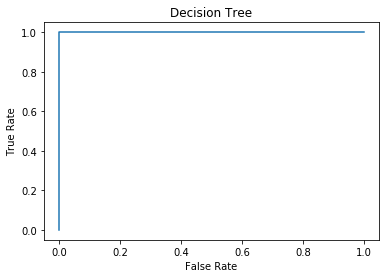

In [182]:
plt.plot(fpr,tpr,label= "Decision Tree Classification")
plt.xlabel("False Rate")
plt.ylabel('True Rate')
plt.title("Decision Tree")
plt.show()

In [183]:
from sklearn.externals import joblib
joblib.dump(knr,"Avocado Region.csv")

['Avocado Region.csv']

In [184]:
model = joblib.load("Avocado Region.csv")

In [185]:
model.predict(x_test)

array([15.        , 28.        , 34.        , ..., 33.        ,
       29.42857143, 42.        ])